In [7]:
import urllib.request
#if the arg is empty in ProxyHandler, urllib will find itself your proxy config.
proxy_support = urllib.request.ProxyHandler({})
opener = urllib.request.build_opener(proxy_support)
urllib.request.install_opener(opener)



b'<!--# Id: internetaccess.html 115044 2016-03-18 17:59:46Z szhang -->\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3c.org/TR/1999/REC-html401-19991224/loose.dtd">\n<html>\n<head>\n<meta name="description" content="Zscaler makes the internet safe for businesses by protecting their employees from malware, viruses, and other security threats.">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Internet Security by Zscaler</title>\n<script language="JavaScript">var defLang = \'en_US\'</script>\n<!--<img alt="Zscaler" src="https://login.zscloud.net/img_logo_new1.png">-->\n<style type="text/css">\nbody {\nbackground-color:#e3e3e3;\nfont-family:Arial, sans-serif;\nfont-size:12px;\ncolor:#4B4F54;\n}\na {\ncursor:pointer;\ntext-decoration:none;\ncolor:#009dd0;\n}\ntable {\nmargin-top:10px;\n}\ntd table {\nmargin-top:0;\ntext-align:center;\n}\nimg {\nmax-height:75px;\
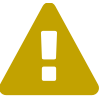

In [8]:
import requests
# make sure ES is up and running
# for some reason, the root level endpoint of 9200 port is blocked. it's not a problem to access _search and other api endpoint though
res = requests.get('http://localhost:9200')
print(res.content)

In [9]:
#connect to our cluster
from elasticsearch import Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port': 9200}])

In [10]:
#index some test data
es.index(index='test-index', doc_type='test', id=1, body={'test': 'test'})

{'_index': 'test-index',
 '_type': 'test',
 '_id': '1',
 '_version': 1,
 'result': 'created',
 '_shards': {'total': 2, 'successful': 1, 'failed': 0},
 '_seq_no': 0,
 '_primary_term': 1}

In [11]:
#delete test data and try with something more interesting
es.delete(index='test-index', doc_type='test', id=1)

{'_index': 'test-index',
 '_type': 'test',
 '_id': '1',
 '_version': 2,
 'result': 'deleted',
 '_shards': {'total': 2, 'successful': 1, 'failed': 0},
 '_seq_no': 1,
 '_primary_term': 1}

In [12]:
es.index(index='sw', doc_type='people', id=1, body={
    "name": "Luke Skywalker",
    "height": "172",
    "mass": "77",
    "hair_color": "blond",
    "birth_year": "19BBY",
    "gender": "male",
})

{'_index': 'sw',
 '_type': 'people',
 '_id': '1',
 '_version': 1,
 'result': 'created',
 '_shards': {'total': 2, 'successful': 1, 'failed': 0},
 '_seq_no': 0,
 '_primary_term': 1}

In [17]:
#let's iterate over swapi people documents and index them
import json
# r = requests.get('http://localhost:9200') 
status_code = 200
#print(r)
i = 1
while status_code == 200:
    r = requests.get('http://swapi.co/api/people/'+ str(i))
    status_code = r.status_code
    print(status_code)
    es.index(index='sw', doc_type='people', id=i, body=json.loads(r.content))
    i=i+1
    
print(i)

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
404
18


In [18]:
#let's iterate over swapi people documents and index them
import json
# r = requests.get('http://localhost:9200') 
status_code = 200
#print(r)
i = 18
while status_code == 200:
    r = requests.get('http://swapi.co/api/people/'+ str(i))
    status_code = r.status_code
    print(status_code)
    es.index(index='sw', doc_type='people', id=i, body=json.loads(r.content))
    i=i+1
    
print(i)

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
404
90


In [19]:
es.get(index='sw', doc_type='people', id=65)

{'_index': 'sw',
 '_type': 'people',
 '_id': '65',
 '_version': 1,
 '_seq_no': 82,
 '_primary_term': 1,
 'found': True,
 '_source': {'name': 'Barriss Offee',
  'height': '166',
  'mass': '50',
  'hair_color': 'black',
  'skin_color': 'yellow',
  'eye_color': 'blue',
  'birth_year': '40BBY',
  'gender': 'female',
  'homeworld': 'https://swapi.co/api/planets/51/',
  'films': ['https://swapi.co/api/films/5/'],
  'species': ['https://swapi.co/api/species/29/'],
  'vehicles': [],
  'starships': [],
  'created': '2014-12-20T16:46:40.440000Z',
  'edited': '2014-12-20T21:17:50.457000Z',
  'url': 'https://swapi.co/api/people/65/'}}

In [26]:
#let's find darth vader
es.search(index="sw", body={"query": {"match" : { "name" : "Darth Vader" }}})

{'took': 0,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 2, 'relation': 'eq'},
  'max_score': 7.0187273,
  'hits': [{'_index': 'sw',
    '_type': 'people',
    '_id': '4',
    '_score': 7.0187273,
    '_source': {'name': 'Darth Vader',
     'height': '202',
     'mass': '136',
     'hair_color': 'none',
     'skin_color': 'white',
     'eye_color': 'yellow',
     'birth_year': '41.9BBY',
     'gender': 'male',
     'homeworld': 'https://swapi.co/api/planets/1/',
     'films': ['https://swapi.co/api/films/2/',
      'https://swapi.co/api/films/6/',
      'https://swapi.co/api/films/3/',
      'https://swapi.co/api/films/1/'],
     'species': ['https://swapi.co/api/species/1/'],
     'vehicles': [],
     'starships': ['https://swapi.co/api/starships/13/'],
     'created': '2014-12-10T15:18:20.704000Z',
     'edited': '2014-12-20T21:17:50.313000Z',
     'url': 'https://swapi.co/api/people/4/'}},
   {'_index': 'sw',

In [21]:
#let's see if we find anyone with a name or surname starting with lu
es.search(index="sw", body={"query": {"prefix" : { "name" : "lu" }}})

{'took': 3,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 2, 'relation': 'eq'},
  'max_score': 1.0,
  'hits': [{'_index': 'sw',
    '_type': 'people',
    '_id': '1',
    '_score': 1.0,
    '_source': {'name': 'Luke Skywalker',
     'height': '172',
     'mass': '77',
     'hair_color': 'blond',
     'skin_color': 'fair',
     'eye_color': 'blue',
     'birth_year': '19BBY',
     'gender': 'male',
     'homeworld': 'https://swapi.co/api/planets/1/',
     'films': ['https://swapi.co/api/films/2/',
      'https://swapi.co/api/films/6/',
      'https://swapi.co/api/films/3/',
      'https://swapi.co/api/films/1/',
      'https://swapi.co/api/films/7/'],
     'species': ['https://swapi.co/api/species/1/'],
     'vehicles': ['https://swapi.co/api/vehicles/14/',
      'https://swapi.co/api/vehicles/30/'],
     'starships': ['https://swapi.co/api/starships/12/',
      'https://swapi.co/api/starships/22/'],
     'created

In [33]:
#let's try a fuzzy query
q = es.search(index="sw", body={
        "query": {
            "more_like_this" : {
                "fields" : ["name"],
                "like": "Luminara",
                "min_term_freq" : 1,
                "max_query_terms" : 5
            }
        }
    }
)

In [34]:
q

{'took': 0,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 0, 'relation': 'eq'},
  'max_score': None,
  'hits': []}}